In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

# Data Analysis

In [5]:
#Checking shape of our dataset
df.shape

(70000, 13)

In [6]:
df=df.drop(columns = ["id"])

In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Check if there any null values
df.isnull().values.any()

False

In [9]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [11]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


0    35021
1    34979
Name: cardio, dtype: int64
positive ratio 0.50


/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

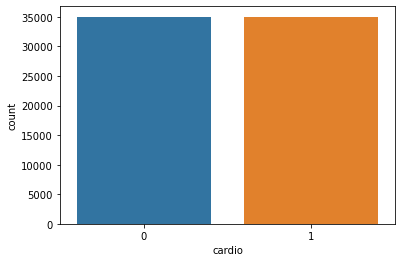

In [12]:
#Checking balanced/imbalanced dataset
print(df['cardio'].value_counts())
print(f"positive ratio {len(df[df.cardio==1])/len(df) :.2f}" )
sns.countplot(df['cardio'])

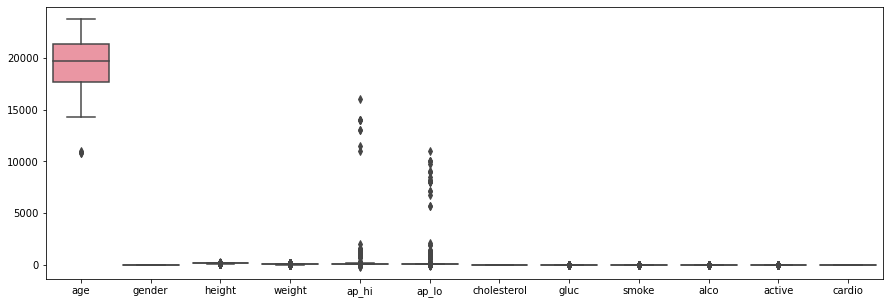

In [13]:
#Checking Outliers
plt.figure(figsize=[15, 5])
sns.boxplot(data = df)

plt.show()

## Remove Outliers

In [14]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [15]:
print(df.shape)
df["z_score_1"]=(df.ap_hi-df.ap_hi.mean())/df.ap_hi.std()

df=df[(df.z_score_1<2) & (df.z_score_1>-2)]
print(df.shape)

df.head()

(70000, 12)
(69962, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,z_score_1
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,-0.122181
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.072610
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.007679
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.137540
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,-0.187111


In [16]:
df=df.drop(columns="z_score_1")

In [17]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df.ap_lo.describe()

count    69962.000000
mean        96.646022
std        188.521107
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [19]:
print(df.shape)
df["z_score_1"]=(df.ap_lo-df.ap_lo.mean())/df.ap_lo.std()

df=df[(df.z_score_1<3) & (df.z_score_1>-3)]
print(df.shape)

df.head()

(69962, 12)
(69011, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,z_score_1
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,-0.088298
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,-0.035253
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,-0.141342
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.017791
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,-0.194387


In [20]:
df=df.drop(columns="z_score_1")

In [21]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
df.shape

(69011, 12)

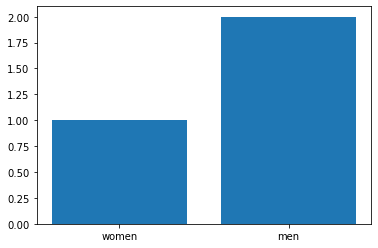

In [23]:
# male/female ratio

women = df[df.gender== 1].shape[0]
men = df[df.gender== 2].shape[0]

plt.bar(["women", "men"], [1, 2])
plt.show()

## Feature Selection

In [24]:
# find out most important features

# label col
y = df.cardio

# independant variable
x = df.drop(columns = ["cardio"] ) 

# corelation y ~ X 
corr_X = x.corrwith(y)
corr_X.sort_values(ascending=False)



ap_hi          0.396218
ap_lo          0.315976
age            0.239693
cholesterol    0.221397
weight         0.179971
gluc           0.089807
gender         0.007528
alco          -0.008115
height        -0.010340
smoke         -0.016324
active        -0.037223
dtype: float64

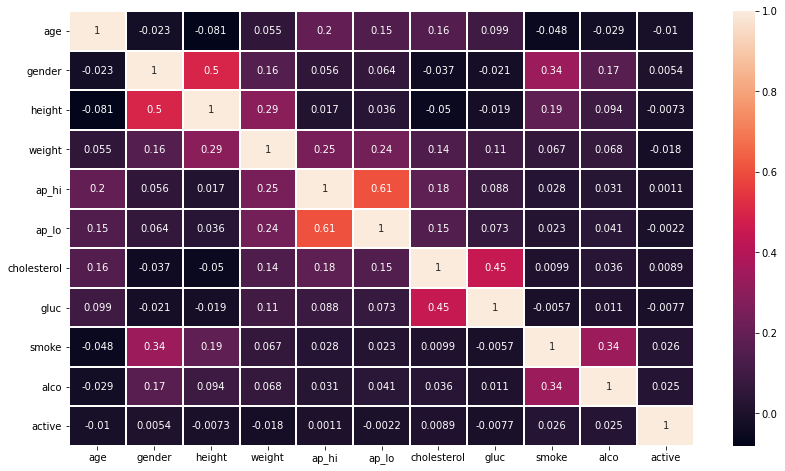

In [25]:
# (2) correlation matrix X ~ X

plt.figure(figsize=(14, 8))

# correlation heatmap
sns.heatmap(x.corr(), annot=True, linewidth =1)

plt.show() 

# Feature Importance

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
etc=ExtraTreesClassifier()

In [28]:
etc.fit(x,y)

ExtraTreesClassifier()

In [29]:
etc.feature_importances_

array([0.29212779, 0.00661103, 0.17543066, 0.18344841, 0.17604478,
       0.09485522, 0.04441997, 0.0118891 , 0.00444718, 0.00467297,
       0.00605288])

In [30]:
top_features=pd.Series(etc.feature_importances_, index= x.columns) 

top_features.nlargest(11)

age            0.292128
weight         0.183448
ap_hi          0.176045
height         0.175431
ap_lo          0.094855
cholesterol    0.044420
gluc           0.011889
gender         0.006611
active         0.006053
alco           0.004673
smoke          0.004447
dtype: float64

<AxesSubplot:>

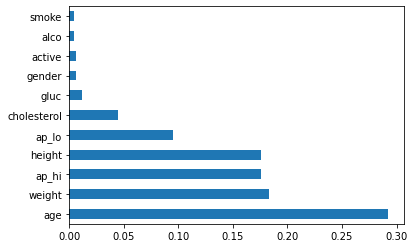

In [31]:
top_features.nlargest(11).plot(kind='barh')

In [32]:
x = x.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )

In [33]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.269841,0.471869,0.223214,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.391534,0.526316,0.238095,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.280423,0.508167,0.208333,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.375661,0.544465,0.252976,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.238095,0.453721,0.193452,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.343915,0.490018,0.223214,0.0,0.0,1.0,0.0,1.0
69996,0.913899,0.0,0.528205,0.608466,0.526316,0.238095,0.5,0.5,0.0,0.0,1.0
69997,0.640186,1.0,0.656410,0.497354,0.598911,0.238095,1.0,0.0,0.0,1.0,0.0
69998,0.900736,0.0,0.553846,0.322751,0.517241,0.223214,0.0,0.5,0.0,0.0,0.0


In [34]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69011, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=5)

In [37]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
66286,0.751142,1.0,0.635897,0.396825,0.508167,0.238095,0.0,0.0,0.0,0.0,1.0
6232,0.818041,0.0,0.600000,0.365079,0.453721,0.208333,0.0,0.0,0.0,0.0,0.0
56783,0.560279,0.0,0.497436,0.238095,0.453721,0.193452,0.0,1.0,0.0,0.0,1.0
5463,0.510569,1.0,0.558974,0.275132,0.471869,0.208333,0.0,0.0,0.0,0.0,1.0
39667,0.394193,0.0,0.533333,0.259259,0.526316,0.238095,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
60310,0.635463,0.0,0.569231,0.253968,0.435572,0.193452,1.0,1.0,0.0,0.0,1.0
5599,0.567480,0.0,0.615385,0.391534,0.490018,0.223214,0.0,0.0,0.0,1.0,1.0
20758,0.530159,1.0,0.589744,0.502646,0.490018,0.223214,0.0,0.5,0.0,0.0,1.0
18908,0.920093,0.0,0.528205,0.306878,0.544465,0.208333,0.0,0.0,0.0,0.0,1.0


# Machine Learning Algorithms

In [38]:


def report_heatmap(y_pred):
    """
    print report and plot the confusion matrix
    
    parameters: y_pred, a list of predicted labels
    
    return: None
    
    
    """
    # overall accuracy 
    acc = accuracy_score(ytest, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(ytest, y_pred))
   
    # confusion matrix
    cm = confusion_matrix(ytest, y_pred)

    # Confusion Matrix Heatmap
    labels = ["0", "1"]
    plt.figure(1, figsize=(8, 5))

    plt.title("Confusion Matrix")

    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}) # Yellow + Green + Blue

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show( )




## Model 1: Random Forest Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfcf = RandomForestClassifier(random_state=42)

In [41]:
rfcf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [42]:
rfcf.score(xtest,ytest)

0.7144823589074839

In [43]:
#Parameter Tuning of RFC
params ={
    
    'n_estimators': [x for x in range(1, 10) ],  
    'max_depth':    [x for x in range(1, 4)],  
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf':  [1, 2, 4], 
}
rfc = GridSearchCV(estimator=rfcf, 
                          param_grid=params, 
                          cv=3, verbose=2, n_jobs=-1)

In [44]:
rfc.fit(xtrain,ytrain)

print("\nRFC best parameters: ")
display(rfc.best_params_)

print("RFC best score: " + str(rfc.best_score_))

Fitting 3 folds for each of 243 candidates, totalling 729 fits

RFC best parameters: 


{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9}

RFC best score: 0.7217612504953931


In [45]:
# best rfc: copy the parameters above 
rfc_best = RandomForestClassifier( n_estimators = 7,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_depth = 3, 
 random_state = 42)

# train
rfc_best.fit(xtrain,ytrain)

# accuracy for testing    
y_pred = rfc_best.predict(xtest)
acc = accuracy_score(y_pred, ytest)
print(f"Best forest model accuracy:{acc:0.3f}")


Best forest model accuracy:0.724


In [46]:
# overfit or not: Compare with Training

# accuracy for training
y_pred_1 = rfc_best.predict(xtrain)
acc_1 = accuracy_score(y_pred_1, ytrain)
print(f"Training Accu, {acc_1:.3f}")

# for testing
y_pred_2 = rfc_best.predict(xtest)
acc_2 = accuracy_score(y_pred_2, ytest)
print(f"Testing Accu, {acc_2:.3f}"  )




Training Accu, 0.723
Testing Accu, 0.724


Overall Accuracy: 72.45%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6978
           1       0.75      0.67      0.71      6825

    accuracy                           0.72     13803
   macro avg       0.73      0.72      0.72     13803
weighted avg       0.73      0.72      0.72     13803



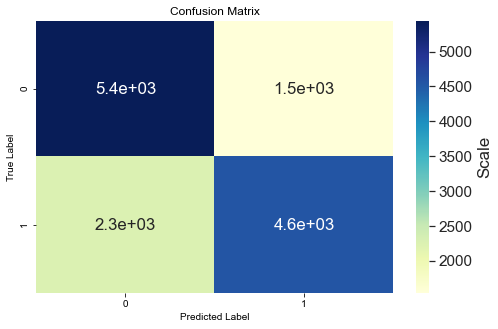

In [47]:
# Model 3: Random Forest Report
y_pred = rfc_best.predict(xtest)
rfc_acc = accuracy_score(ytest, y_pred) 


# report and heatmap
report_heatmap(y_pred)

## Model 2: Decision Tree Classification

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dc=DecisionTreeClassifier(max_depth=3)

In [50]:
dc.fit(xtrain,ytrain)
dc.score(xtest,ytest)

0.7254944577265812

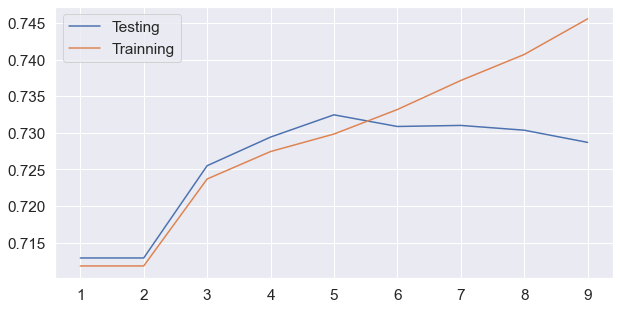

The best d is 5 and the highest accuracy 0.7324494675070636


In [51]:
#Parameter Tuning of DTC


test_score = []
train_score = [ ]

# parameter tuning: loop the max_depth in DecisionTreeClassifier(max_depth)
for depth in range(1, 10):
    # train Tree model
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(xtrain, ytrain)

    # test accuracy
    y_pred = dt.predict(xtest)
    test_score.append(accuracy_score(ytest, y_pred) )
    
    # train accuracy
    y_pred = dt.predict(xtrain)
    train_score.append(accuracy_score(ytrain, y_pred) )
                      
                      
# plot 
x = range(1, 10)
plt.figure(figsize=[10, 5])
plt.plot(x, test_score,  label='Testing')
plt.plot(x, train_score, label='Trainning')
plt.legend()                       
plt.show()

# find best k
best_d = np.array(test_score).argmax() + 1 # as we had the list index starting 0.
print(f"The best d is {best_d} and the highest accuracy {max(test_score)}") 

Overall Accuracy: 73.24%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6978
           1       0.76      0.67      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.74      0.73      0.73     13803
weighted avg       0.74      0.73      0.73     13803



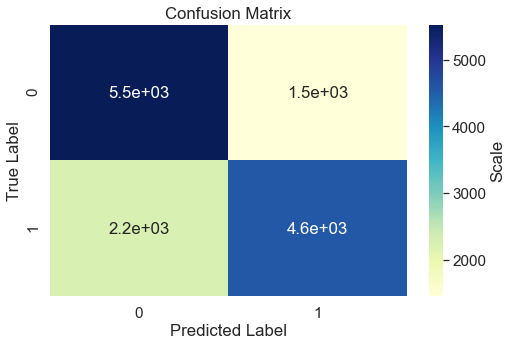

In [52]:
# use the best depth 5 to retrain the Decision Tree
dt_best = DecisionTreeClassifier(max_depth=5)
dt_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = dt_best.predict(xtest)
dt_acc = accuracy_score(ytest, y_pred) 

report_heatmap( y_pred )

## Model 3: Logistic Regression 

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(xtrain,ytrain)
logreg.score(xtest,ytest)

0.7308556110990364

In [54]:
#Parameter Tuning of LR
params ={
    
    'penalty': ['l1','l2'],  
    'C':    np.logspace(-4,4,20),  
    'solver': ['lbfgs','liblinear'],
    'max_iter':  [50, 100], 
}
lr = GridSearchCV(estimator=logreg, 
                          param_grid=params, 
                          cv=3, verbose=2, n_jobs=-1)


In [55]:
lr.fit(xtrain,ytrain)

print("\nLR best parameters: ")
display(lr.best_params_)

print("RFC best score: " + str(lr.best_score_))

Fitting 3 folds for each of 160 candidates, totalling 480 fits


/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.50501739 0.59480503 0.59936962        nan 0.50501739
 0.59480503 0.59936962        nan 0.50501739 0.60478542 0.60166999
        nan 0.50501739 0.60478542 0.60166999        nan 0.50501739
 0.61424062 0.60368057        nan 0.50501739 0.61424062 0.60368057
        nan 0.59197936 0.63226338 0.62079769        nan 0.59197936
 0.63226338 0.62079769        nan 0.62749958 0.64391025 0.63646569
        nan 0.62749958 0.64391025 0.63646569        nan 0.69361317
 0.65617296 0.64963408        nan 0.6937762  0.65617296 0.64963408
        nan 0.7180299  0.67348929 0.66852622        nan 0.71815669
 0.67348929 0.66852622        nan 0.72259443 0.69430146 0.68953766
        nan 0.72273934 0.69433769 0.68953766        nan 0.72380803
 0.71147289 0.70853855        nan 0.72373558 0.71143667 0.70853855
        nan 0.72435144 0.72029405 0


LR best parameters: 


/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'C': 206.913808111479, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

RFC best score: 0.7248405048573666


/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Overall Accuracy: 72.98%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6978
           1       0.75      0.68      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.73      0.73      0.73     13803
weighted avg       0.73      0.73      0.73     13803



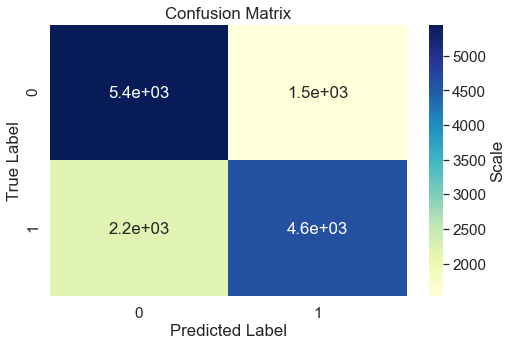

In [56]:
lr_best = LogisticRegression(
    C=1438.44988828766,
    max_iter=50,
    solver="liblinear",
    penalty="l1"
)
lr_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = lr_best.predict(xtest)
lr_acc = accuracy_score(ytest, y_pred) 

report_heatmap( y_pred )

## Model 4: Neural Networks-Multy Layer Perceptron

In [57]:
#Multy Layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    activation="relu",
    hidden_layer_sizes={200,300},
    solver="adam",
    learning_rate_init=0.01,
    random_state=300
)

mlp.fit(xtrain, ytrain)
mlp.score(xtest,ytest)

0.7252046656523944

In [58]:
#Parameter Tuning of MLP
params ={
    'activation': ['logistic','tanh','relu'],  
    'hidden_layer_sizes':[(20,30),(25,)],  
    'solver': ['adam','sgd'],
    'learning_rate_init':  [0.01, 0.1], 
}
mlpc = GridSearchCV(estimator=mlp, 
                          param_grid=params, 
                          cv=3, verbose=2, n_jobs=-1)


In [59]:
mlpc.fit(xtrain,ytrain)
display(mlpc.best_params_)
print("mlpc best score: " + str(mlpc.best_score_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'activation': 'tanh',
 'hidden_layer_sizes': (20, 30),
 'learning_rate_init': 0.01,
 'solver': 'sgd'}

mlpc best score: 0.7283543676001928


Overall Accuracy: 73.72%
--------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      6978
           1       0.75      0.71      0.73      6825

    accuracy                           0.74     13803
   macro avg       0.74      0.74      0.74     13803
weighted avg       0.74      0.74      0.74     13803



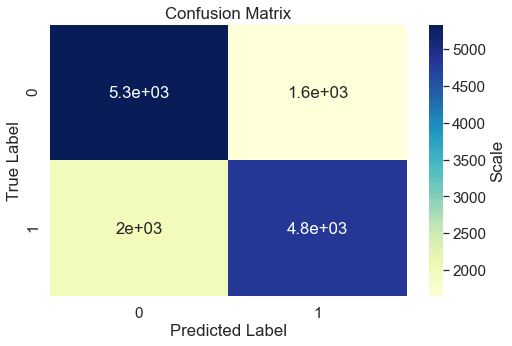

In [60]:
mlpc_best = MLPClassifier(
    activation="relu",
    hidden_layer_sizes={20,30},
    solver="adam",
    learning_rate_init=0.01,
    random_state=300
)
mlpc_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = mlpc_best.predict(xtest)
mlpc_acc = accuracy_score(ytest, y_pred) 

report_heatmap( y_pred )

In [61]:
import tensorflow as tf
from tensorflow import keras 

## Model 5: Neural Networks:Sequential API

In [62]:
model = keras.Sequential([
    keras.layers.Dense(2,input_shape=(11,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain, epochs=10)


Epoch 1/10
1726/1726 [==============================] - 2s 777us/step - loss: 0.6879 - accuracy: 0.5642
Epoch 2/10
1726/1726 [==============================] - 1s 763us/step - loss: 0.6518 - accuracy: 0.6190
Epoch 3/10
1726/1726 [==============================] - 1s 777us/step - loss: 0.6443 - accuracy: 0.6307
Epoch 4/10
1726/1726 [==============================] - 1s 782us/step - loss: 0.6400 - accuracy: 0.6364
Epoch 5/10
1726/1726 [==============================] - 1s 816us/step - loss: 0.6366 - accuracy: 0.6408
Epoch 6/10
1726/1726 [==============================] - 1s 782us/step - loss: 0.6338 - accuracy: 0.6443
Epoch 7/10
1726/1726 [==============================] - 2s 1ms/step - loss: 0.6314 - accuracy: 0.6471
Epoch 8/10
1726/1726 [==============================] - 2s 883us/step - loss: 0.6292 - accuracy: 0.6511
Epoch 9/10
1726/1726 [==============================] - 2s 900us/step - loss: 0.6273 - accuracy: 0.6527
Epoch 10/10
1726/1726 [==============================] - 1s 835us/

In [63]:
y_pred = model.predict(xtest, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(ytest, y_pred_bool))

216/216 [==============================] - 0s 592us/step
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6978
           1       0.66      0.64      0.65      6825

    accuracy                           0.66     13803
   macro avg       0.66      0.66      0.66     13803
weighted avg       0.66      0.66      0.66     13803



In [64]:
score = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
dnn_accr=score[1]
#print(accr)

432/432 [==============================] - 1s 728us/step - loss: 0.6246 - accuracy: 0.6563
Test loss: 0.6246126890182495
Test accuracy: 0.6563066244125366


## Model 6: K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)
knn.score(xtest,ytest)

0.6865898717670071

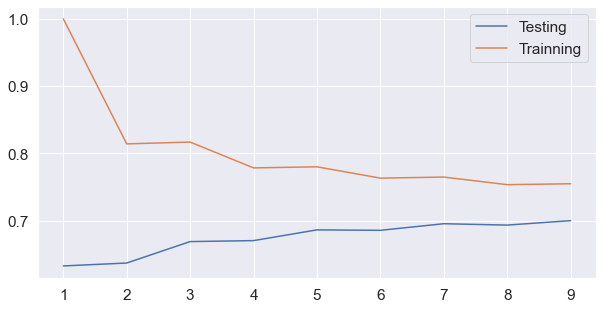

The best k is 9 and the highest accuracy 0.7002825472723321


In [67]:
# parameter tuning: what is the best K (we had k = 10)
test_score = []
train_score = [ ]

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    
    # test accuracy
    y_pred = knn.predict(xtest)
    test_score.append(accuracy_score(ytest, y_pred) )
    
    # train accuracy
    y_pred = knn.predict(xtrain)
    train_score.append(accuracy_score(ytrain, y_pred) )
                      
                      
# plot 
x = range(1, 10)
plt.figure(figsize=[10, 5])
plt.plot(x, test_score,  label='Testing')
plt.plot(x, train_score, label='Trainning')
plt.legend()                       
plt.show()

# find best k
best_k = np.array(test_score).argmax() + 1 # as we had the list index starting 0.
print(f"The best k is {best_k} and the highest accuracy {max(test_score)}")

Overall Accuracy: 70.03%
--------------------------
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      6978
           1       0.71      0.67      0.69      6825

    accuracy                           0.70     13803
   macro avg       0.70      0.70      0.70     13803
weighted avg       0.70      0.70      0.70     13803



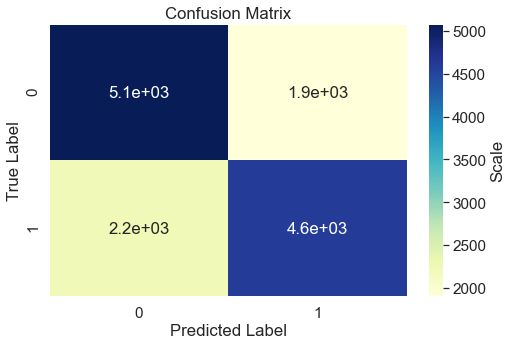

In [68]:
# recal. using best k

knn_best = KNeighborsClassifier(n_neighbors =  best_k)
knn_best.fit(xtrain, ytrain)
y_pred = knn_best.predict(xtest)
k_NN_acc = accuracy_score(ytest, y_pred)

# overall accuracy and report
report_heatmap(y_pred)

## Ensemble Method 

In [69]:
from sklearn.ensemble import StackingClassifier

In [70]:
estimator=[
    ('LR',lr_best),
    ('KNN',knn_best),
    ('RFCF',rfc_best),
    ('DT',dt_best)]
clf=StackingClassifier(estimators=estimator, final_estimator=LogisticRegression())
clf.fit(xtrain, ytrain)

/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=1438.44988828766,
                                                   max_iter=50, penalty='l1',
                                                   solver='liblinear')),
                               ('KNN', KNeighborsClassifier(n_neighbors=9)),
                               ('RFCF',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=7,
                                                       random_state=42)),
                               ('DT', DecisionTreeClassifier(max_depth=5))],
                   final_estimator=LogisticRegression())

Overall Accuracy: 73.61%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6978
           1       0.76      0.68      0.72      6825

    accuracy                           0.74     13803
   macro avg       0.74      0.74      0.73     13803
weighted avg       0.74      0.74      0.74     13803



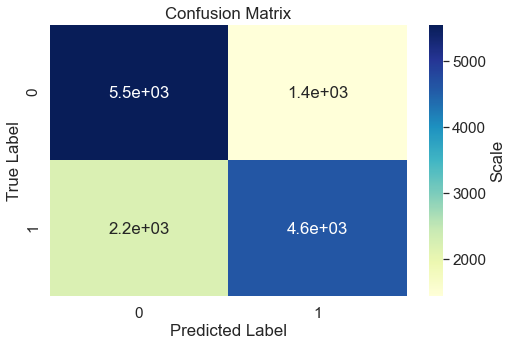

In [71]:
y_pred = clf.predict(xtest)
clfacc = accuracy_score(ytest, y_pred)
clfacc

report_heatmap( y_pred )

## Support vector machine

In [72]:
from sklearn import svm

In [73]:
svc = svm.SVC()
svc_fit = svc.fit(xtrain, ytrain)

SVM accuracy = 0.7305658190248496
Overall Accuracy: 73.06%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6978
           1       0.75      0.68      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.73      0.73      0.73     13803
weighted avg       0.73      0.73      0.73     13803



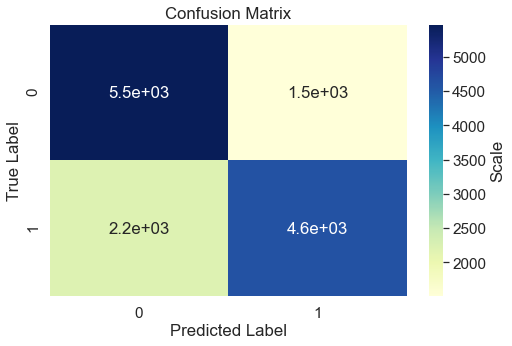

In [74]:
y_pred = svc.predict(xtest)

svm_acc = accuracy_score(ytest, y_pred)
print("SVM accuracy = " + str(svm_acc))

report_heatmap( y_pred )

## Model Comparison 

,SVM,Ensemble,DNN,MLPNN,KNN,Logistic R,Decision Tree,Random Forest
accuracy,0.730566,0.736072,0.656307,0.737231,0.700283,0.729769,0.732449,0.72448


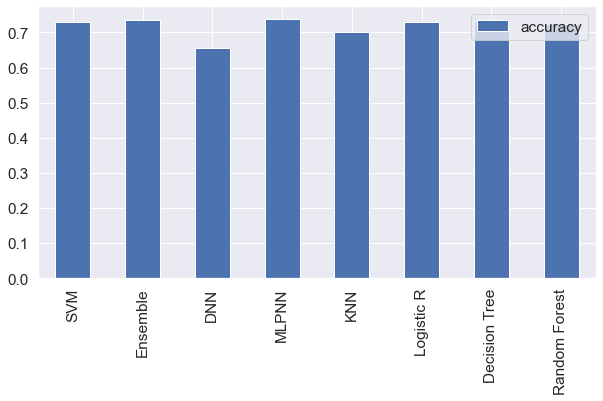

In [75]:
# Accuracies for three best models 
model_compare = pd.DataFrame({"SVM":svm_acc,"Ensemble":clfacc,"DNN":dnn_accr,"MLPNN":mlpc_acc,"KNN":k_NN_acc,"Logistic R":lr_acc, "Decision Tree":dt_acc, "Random Forest":rfc_acc}, index=["accuracy"])
model_compare.T.plot.bar(figsize=[10, 5]) 

display(model_compare)

plt.show( )


In [76]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Application of Dropped Columns based on Feature Importances

In [77]:
# label col
y = df.cardio

# independant variable
x = df.drop(columns = ["cardio"] ) 

In [78]:
x.shape

(69011, 11)

In [79]:
x=x.drop(columns=['gender','active','smoke','alco'])

In [80]:
x

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,168,62.0,110,80,1,1
1,20228,156,85.0,140,90,3,1
2,18857,165,64.0,130,70,3,1
3,17623,169,82.0,150,100,1,1
4,17474,156,56.0,100,60,1,1
...,...,...,...,...,...,...,...
69995,19240,168,76.0,120,80,1,1
69996,22601,158,126.0,140,90,2,2
69997,19066,183,105.0,180,90,3,1
69998,22431,163,72.0,135,80,1,2


In [81]:
x = x.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )

In [82]:
x

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,0.588076,0.579487,0.269841,0.471869,0.223214,0.0,0.0
1,0.730159,0.517949,0.391534,0.526316,0.238095,1.0,0.0
2,0.624003,0.564103,0.280423,0.508167,0.208333,1.0,0.0
3,0.528455,0.584615,0.375661,0.544465,0.252976,0.0,0.0
4,0.516918,0.517949,0.238095,0.453721,0.193452,0.0,0.0
...,...,...,...,...,...,...,...
69995,0.653659,0.579487,0.343915,0.490018,0.223214,0.0,0.0
69996,0.913899,0.528205,0.608466,0.526316,0.238095,0.5,0.5
69997,0.640186,0.656410,0.497354,0.598911,0.238095,1.0,0.0
69998,0.900736,0.553846,0.322751,0.517241,0.223214,0.0,0.5


In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=5)

## Random Forest Classification

In [84]:
# best rfc: copy the parameters above 
rfc_best = RandomForestClassifier( n_estimators = 7,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_depth = 3, 
 random_state = 42)

# train
rfc_best.fit(xtrain,ytrain)

# accuracy for testing    
y_pred = rfc_best.predict(xtest)
acc = accuracy_score(y_pred, ytest)

print("After dropping the features whose importance is lower than 0.01.")
print(f"Best forest model accuracy:{acc:0.3f}")


After dropping the features whose importance is lower than 0.01.
Best forest model accuracy:0.723


## Decision Tree Classification

After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 73.03%
--------------------------
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      6978
           1       0.78      0.64      0.70      6825

    accuracy                           0.73     13803
   macro avg       0.74      0.73      0.73     13803
weighted avg       0.74      0.73      0.73     13803



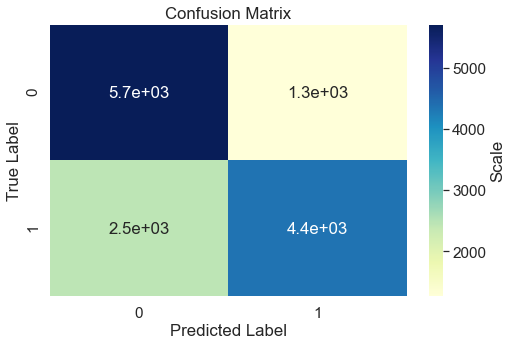

In [85]:
# use the best depth 3 to retrain the Decision Tree
dt_best = DecisionTreeClassifier(max_depth=7)
dt_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = dt_best.predict(xtest)
dt_acc = accuracy_score(ytest, y_pred) 

print("After dropping the features whose importance is lower than 0.01.")
report_heatmap( y_pred )

## Logistic Regression

After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 72.83%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6978
           1       0.75      0.67      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.73      0.73      0.73     13803
weighted avg       0.73      0.73      0.73     13803



/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


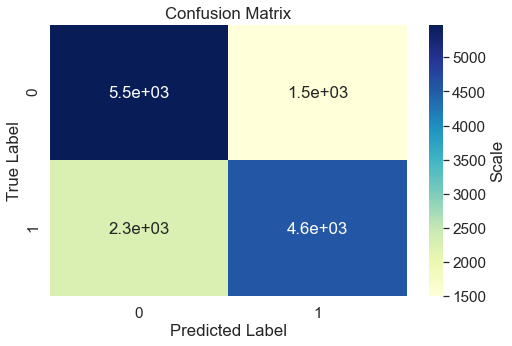

In [86]:
# use the best depth 3 to retrain the Decision Tree
lr_best = LogisticRegression(
    C=3792.690190732246,
    max_iter=50,
    solver="liblinear",
    penalty="l1"
)
lr_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = lr_best.predict(xtest)
lr_acc = accuracy_score(ytest, y_pred) 

print("After dropping the features whose importance is lower than 0.01.")
report_heatmap( y_pred )

## Multiple Layer Perceptron Classification

After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 72.74%
--------------------------
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      6978
           1       0.79      0.61      0.69      6825

    accuracy                           0.73     13803
   macro avg       0.74      0.73      0.72     13803
weighted avg       0.74      0.73      0.72     13803



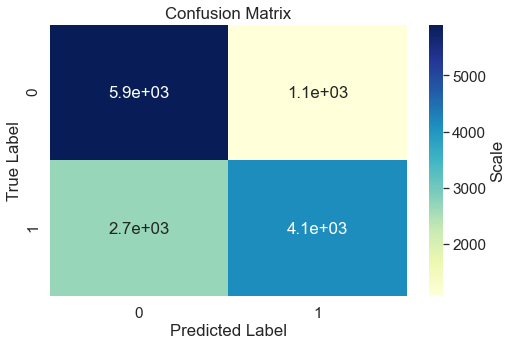

In [87]:
# use the best depth 3 to retrain the Decision Tree
mlpc_best = MLPClassifier(
    activation="relu",
    hidden_layer_sizes={20,30},
    solver="adam",
    learning_rate_init=0.01,
    random_state=300
)
mlpc_best.fit(xtrain, ytrain)


# Report and heatmap
y_pred = mlpc_best.predict(xtest)
mlpc_acc = accuracy_score(ytest, y_pred) 

print("After dropping the features whose importance is lower than 0.01.")
report_heatmap( y_pred )

## K-Nearest Neighbor Classification

After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 70.79%
--------------------------
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6978
           1       0.71      0.68      0.70      6825

    accuracy                           0.71     13803
   macro avg       0.71      0.71      0.71     13803
weighted avg       0.71      0.71      0.71     13803



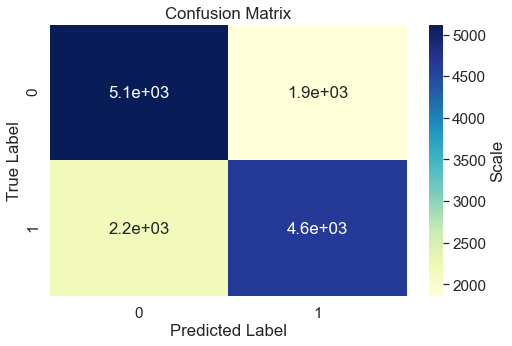

In [88]:
# recal. using best k

knn_best = KNeighborsClassifier(n_neighbors =  best_k)
knn_best.fit(xtrain, ytrain)
y_pred = knn_best.predict(xtest)
k_NN_acc = accuracy_score(ytest, y_pred)

print("After dropping the features whose importance is lower than 0.01.")
# overall accuracy and report
report_heatmap(y_pred)

## Deep Neural Network

In [89]:
model1 = keras.Sequential([
    keras.layers.Dense(2,input_shape=(7,),activation='sigmoid')
])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model1.fit(xtrain,ytrain, epochs=10)
score = model1.evaluate(xtest, ytest, verbose=1)

print("After dropping the features whose importance is lower than 0.01.")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
dnn_accr=score[1]


Epoch 1/10
1726/1726 [==============================] - 2s 924us/step - loss: 0.6766 - accuracy: 0.5852
Epoch 2/10
1726/1726 [==============================] - 2s 872us/step - loss: 0.6507 - accuracy: 0.6182
Epoch 3/10
1726/1726 [==============================] - 1s 766us/step - loss: 0.6433 - accuracy: 0.6364
Epoch 4/10
1726/1726 [==============================] - 1s 766us/step - loss: 0.6384 - accuracy: 0.6436
Epoch 5/10
1726/1726 [==============================] - 1s 796us/step - loss: 0.6348 - accuracy: 0.6464
Epoch 6/10
1726/1726 [==============================] - 1s 807us/step - loss: 0.6320 - accuracy: 0.6487
Epoch 7/10
1726/1726 [==============================] - 1s 774us/step - loss: 0.6297 - accuracy: 0.6512
Epoch 8/10
1726/1726 [==============================] - 1s 766us/step - loss: 0.6277 - accuracy: 0.6532
Epoch 9/10
1726/1726 [==============================] - 1s 801us/step - loss: 0.6257 - accuracy: 0.6543
Epoch 10/10
432/432 [==============================] - 0s 709us/

## Ensemble Method

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
estimator=[
    ('LR',lr_best),
    ('KNN',knn_best),
    ('RFCF',rfc_best),
    ('DT',dt_best)]
clf=StackingClassifier(estimators=estimator, final_estimator=LogisticRegression())
clf.fit(xtrain, ytrain)

/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wuchengying/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=3792.690190732246,
                                                   max_iter=50, penalty='l1',
                                                   solver='liblinear')),
                               ('KNN', KNeighborsClassifier(n_neighbors=9)),
                               ('RFCF',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=7,
                                                       random_state=42)),
                               ('DT', DecisionTreeClassifier(max_depth=7))],
                   final_estimator=LogisticRegression())

After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 73.23%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6978
           1       0.76      0.68      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.73      0.73      0.73     13803
weighted avg       0.73      0.73      0.73     13803



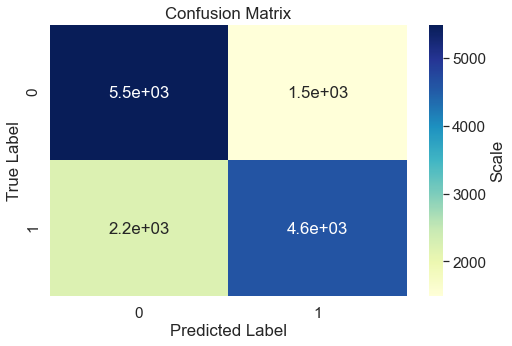

In [92]:
y_pred = clf.predict(xtest)
clfacc = accuracy_score(ytest, y_pred)
clfacc

print("After dropping the features whose importance is lower than 0.01.")
report_heatmap( y_pred )

## Support vector machine

In [93]:
from sklearn import svm

In [94]:
svc = svm.SVC()
svc_fit = svc.fit(xtrain, ytrain)

SVM accuracy = 0.7320872274143302
After dropping the features whose importance is lower than 0.01.
Overall Accuracy: 73.21%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6978
           1       0.76      0.68      0.71      6825

    accuracy                           0.73     13803
   macro avg       0.73      0.73      0.73     13803
weighted avg       0.73      0.73      0.73     13803



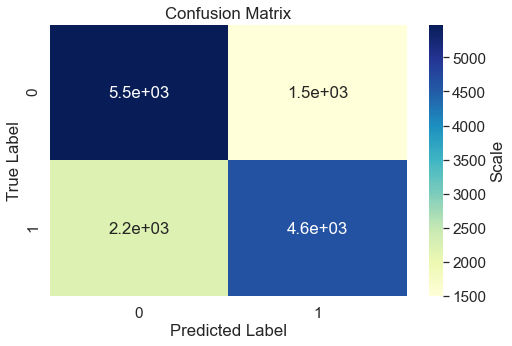

In [95]:
y_pred = svc.predict(xtest)

svm_acc = accuracy_score(ytest, y_pred)
print("SVM accuracy = " + str(svm_acc))

print("After dropping the features whose importance is lower than 0.01.")
report_heatmap( y_pred )

## Model Comparision

After dropping the features whose importance is lower than 0.01.


,SVM,Ensemble,DNN,MLPNN,KNN,Logistic R,Decision Tree,Random Forest
accuracy,0.732087,0.732305,0.659132,0.727378,0.70789,0.72832,0.730276,0.72448


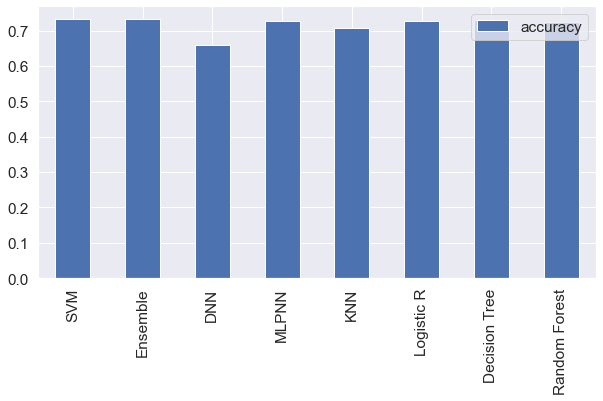

In [99]:
# Accuracies for three best models 
model_compare1 = pd.DataFrame({"SVM":svm_acc,"Ensemble":clfacc,"DNN":dnn_accr,"MLPNN":mlpc_acc,"KNN":k_NN_acc,"Logistic R":lr_acc, "Decision Tree":dt_acc, "Random Forest":rfc_acc}, index=["accuracy"])
model_compare1.T.plot.bar(figsize=[10, 5]) 

print("After dropping the features whose importance is lower than 0.01.")
display(model_compare1)

plt.show( )